In [60]:
import os
import pandas as pd
import numpy as np
import pickle

# Library Visualisasi
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Library Preprocessing
import re #regular expression
from tensorflow.keras.layers import TextVectorization #tokenization, lowercase, delete tanda baca, delete white space berlebih
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Library Training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

# Library Evaluasi Model
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [3]:
np.expand_dims??

Signature:       np.expand_dims(a, axis)
Call signature:  np.expand_dims(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function expand_dims at 0x000002384A3F3A60>
File:            c:\users\lenovo\scoop\apps\python311\current\lib\site-packages\numpy\lib\shape_base.py
Source:         
@array_function_dispatch(_expand_dims_dispatcher)
def expand_dims(a, axis):
    """
    Expand the shape of an array.

    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int or tuple of ints
        Position in the expanded axes where the new axis (or axes) is placed.

        .. deprecated:: 1.13.0
            Passing an axis where ``axis > a.ndim`` will be treated as
            ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
            be treated as ``axis == 0``. This behavior is deprecated.

        .. versionchanged:: 1.18.0
         

In [4]:
# kernel python 3.10

In [5]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [6]:
dataset = pd.read_csv(os.path.join('dataset_toxic','train.csv', 'train.csv'))

In [7]:
df = dataset.copy()

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.iloc[3]['comment_text']

'"\r\nMore\r\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [10]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [11]:
df[df['toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\r\n@ | talk .\r\nWhat is i...,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \r\n\r\nDon't look, come or think of comm...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \r\n\r\nArchange...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\r\n\r\n our previous conversation \r\n\r\nyo...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\r\n\r\nHey listen don't you ever!!!! Delete ...",1,0,0,0,1,0


In [12]:
df[df['severe_toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \r\n\r\nand your mother'...,1,1,1,0,1,0
442,01208d2b76624130,Hi \r\n\r\nIm a fucking bitch.\r\n\r\n50.180.2...,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159096,f871b05d4caa6f20,"You filthy, stinking crow! \r\n\r\nI am back! ...",1,1,1,0,1,0
159099,f885a3e2d779342e,now\r\n\r\nyou fucking pathetic moron. \r\n\r\...,1,1,1,0,1,0
159281,fb726deec64157bd,LoL!! \r\n\r\nyou're GAY!! you will never know...,1,1,1,0,1,1
159312,fbf20e312cd4a78d,"Walter Mercado \r\n\r\nAntonio, quite frankly,...",1,1,1,0,1,0


In [13]:
df[df['obscene'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \r\n\r\nArchange...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \r\n\r\nyou obese piece of s...,1,0,1,0,1,0
159493,fef142420a215b90,FUCKING FAGGOT \r\n\r\nLOLWAT.,1,0,1,0,1,0
159494,fef4cf7ba0012866,"""\r\n\r\n our previous conversation \r\n\r\nyo...",1,0,1,0,1,1
159541,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,1,0,1,0,1,0


In [14]:
df[df['threat'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
79,003217c3eb469ba9,Hi! I am back again!\r\nLast warning!\r\nStop ...,1,0,0,1,0,0
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1,0,1,1,1,0
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
157718,e26b106943e02cbf,bitch \r\nyou are a fucking hore. you suck dic...,1,0,1,1,1,1
158717,f264b7fb9a4b4f53,stupid head \r\n\r\nYOur dumb and you are stup...,1,0,1,1,1,0
158856,f4dca9e513e0366f,"Hey \r\n\r\nhey faggot, are you dead yet? or a...",1,1,1,1,1,0
159029,f780e4f42aa5a344,Death to Musulmans!,1,0,0,1,0,1


In [15]:
df[df['insult'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \r\n\r\nArchange...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\r\n\r\n our previous conversation \r\n\r\nyo...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\r\n\r\nHey listen don't you ever!!!! Delete ...",1,0,0,0,1,0


In [16]:
df[df['identity_hate'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,You are gay or antisemmitian? \r\n\r\nArchange...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \r\n\r\nI have hard, that ot...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,LoL!! \r\n\r\nyou're GAY!! you will never know...,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,"Oh, fuck off. The pansy Jew would just whine a...",1,0,1,0,1,1
159400,fd052883fa6a8697,"Shalom \r\n\r\nSemite, get the fuck out of her...",1,1,1,1,1,1
159449,fdce660ddcd6d7ca,I think he is a gay fag!!!,1,0,0,0,0,1


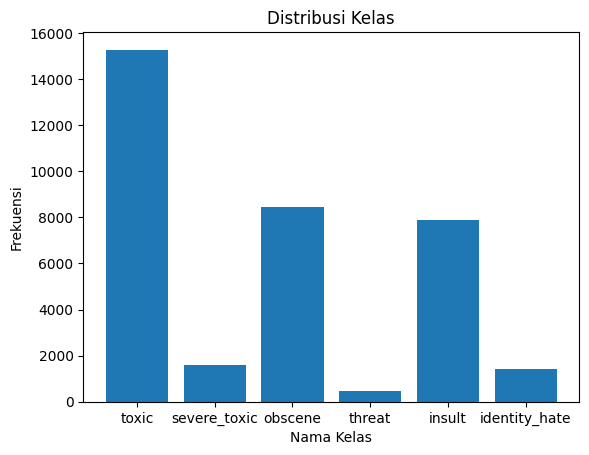

In [17]:
# Visualize Jumlah Label
class_names = df.columns[2:]
class_counts = df[class_names].sum(axis=0)
plt.bar(class_names, class_counts)
plt.title('Distribusi Kelas')
plt.xlabel('Nama Kelas')
plt.ylabel('Frekuensi')
plt.show()

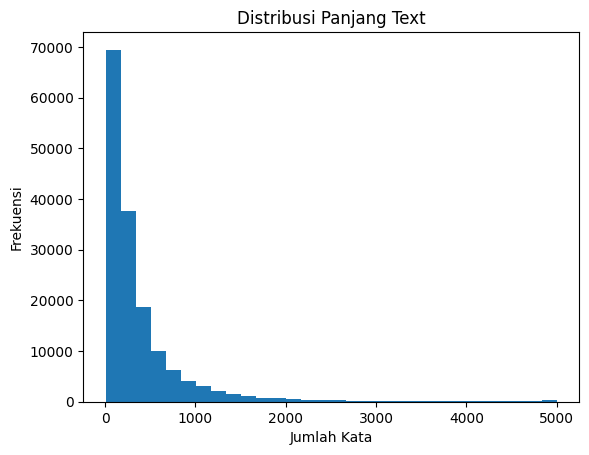

In [18]:
# Visualize text length distribution
text_lengths = [len(comment) for comment in df['comment_text'].values]
plt.hist(text_lengths, bins=30)
plt.title('Distribusi Panjang Text')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

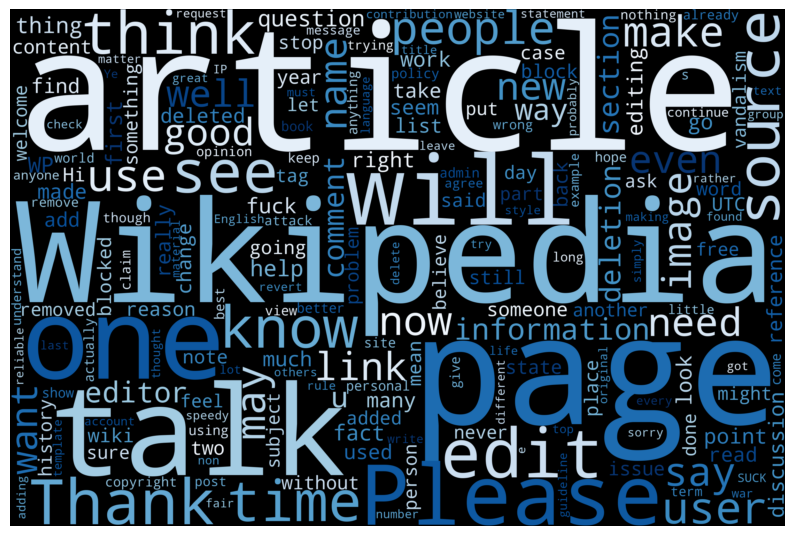

In [20]:
# Function untuk menampilkan wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=[10, 8])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# gabungkan semua text menjadi 1 string
all_text = ' '.join(df['comment_text'].values)

# membuat word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color = 'black',
    colormap = 'Blues_r',
    collocations = False,
).generate(all_text)

# tampilkan wordcloudnya
plot_cloud(wordcloud)

# Normalisasi Data

In [21]:
def normalize_text(text):
    text = text.lower()  # Ubah menjadi huruf kecil
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"ain't", "are not", text)
    text = re.sub(r"ive", "i have", text)
    text = re.sub(r"ok", "okay", text)
    text = re.sub(r"they're", "they are", text)
    return text

In [22]:
df['comment_text'] = df['comment_text'].apply(normalize_text)

In [24]:
df['comment_text']

0         explanation\r\nwhy the edits made under my use...
1         d'aww! he matches this background colour i am ...
2         hey man, i am really not trying to edit war. i...
3         "\r\nmore\r\ni cannot make any real suggestion...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \r\n\r\nthat...
159568    spitzer \r\n\r\numm, theres no actual article ...
159569    and it lookays like it was actually you who pu...
159570    "\r\nand ... i really do not think you underst...
Name: comment_text, Length: 159571, dtype: object

# Cleaning Data

In [25]:
df.shape

(159571, 8)

In [26]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text) # Hapus mention
    text = re.sub(r'#\w+','',text) # Hapus hashtag
    text = re.sub(r'RT[\s]+','',text) # Hapus retweet
    text = re.sub(r'https?://\S+','',text) # Hapus url
    text = re.sub(r'\r\n', ' ', text)  # Mengubah \r\n menjadi spasi
    text = re.sub(r'\r|\n', ' ', text) # Hapus karakter escape seperti \r dan \n
    text = re.sub(r'[^A-Za-z0-9 ]','',text) # Hapus karakter non alpha numeric
    text = re.sub(r'\d+', '', text) # hapus angka
    text = re.sub(r'\s+',' ',text).strip() # Hapus spasi berlebih

    return text

In [29]:
df['comment_text'] = df['comment_text'].apply(clean_text)

In [30]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour i am se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it lookays like it was actually you who pu...,0,0,0,0,0,0


# 1. Preprocess

- Stopword
- Lemmatization
- Tokenization

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
def stopword_text(text):
    # Hapus stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [34]:
df['comment_text'] = df['comment_text'].apply(stopword_text)

In [35]:
df['comment_text']

0         explanation edits made username hardcore metal...
1         daww matches background colour seemingly stuck...
2         hey man really trying edit war guy constantly ...
3         cannot make real suggestions improvement wonde...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    lookays like actually put speedy first version...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [36]:
def lemmatization_text(text):
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [37]:
df['comment_text'] = df['comment_text'].apply(lemmatization_text)

In [38]:
df['comment_text']

0         explanation edits made username hardcore metal...
1         daww match background colour seemingly stuck t...
2         hey man really trying edit war guy constantly ...
3         cannot make real suggestion improvement wonder...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    lookays like actually put speedy first version...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [39]:
# feature extraction
X = df['comment_text']
y = df[df.columns[2:]].values

In [40]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [41]:
X

0         explanation edits made username hardcore metal...
1         daww match background colour seemingly stuck t...
2         hey man really trying edit war guy constantly ...
3         cannot make real suggestion improvement wonder...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    lookays like actually put speedy first version...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [42]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

## Tokenization

In [43]:
MAX_FEATURES = 200000 #number of words in the vocab

In [44]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int')

In [45]:
TextVectorization??

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    name=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.TextVectorization")
class TextVectorization(Layer):
    """A preprocessing layer which maps text features to integer sequences.

    This layer has basic options for managing text in a Keras model. It
    transforms a batch of strings (one example = one string) into either a list
    of token indices (one example = 1D tensor of integer token indices) or a
    dense representation (one example = 1D tensor of float values representing
    data about the example's tokens). This layer is meant to handle natural
    language inputs. To handle simple string inputs (categorical strings or
    pr

In [46]:
X

0         explanation edits made username hardcore metal...
1         daww match background colour seemingly stuck t...
2         hey man really trying edit war guy constantly ...
3         cannot make real suggestion improvement wonder...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    lookays like actually put speedy first version...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [47]:
type(X)

pandas.core.series.Series

In [48]:
X.values #mengubah X pandas series ke numpy

array(['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired',
       'daww match background colour seemingly stuck thanks talk january utc',
       'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
       ...,
       'spitzer umm there actual article prostitution ring crunch captain',
       'lookays like actually put speedy first version deleted lookay',
       'really think understand came idea bad right away kind community go bad idea go away instead helping rewrite'],
      dtype=object)

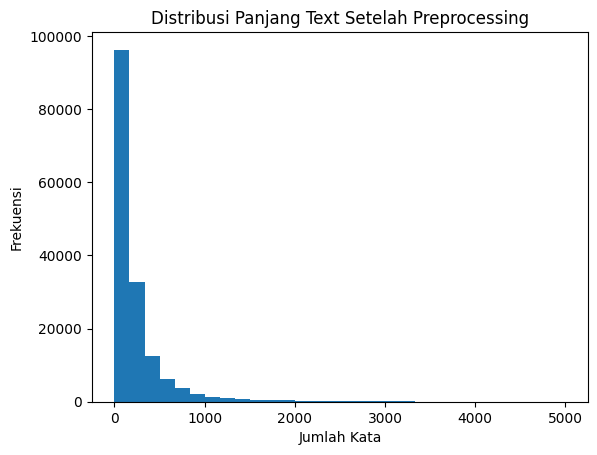

In [49]:
# Visualize text length distribution
text_lengths = [len(comment) for comment in X.values]
plt.hist(text_lengths, bins=30)
plt.title('Distribusi Panjang Text Setelah Preprocessing')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

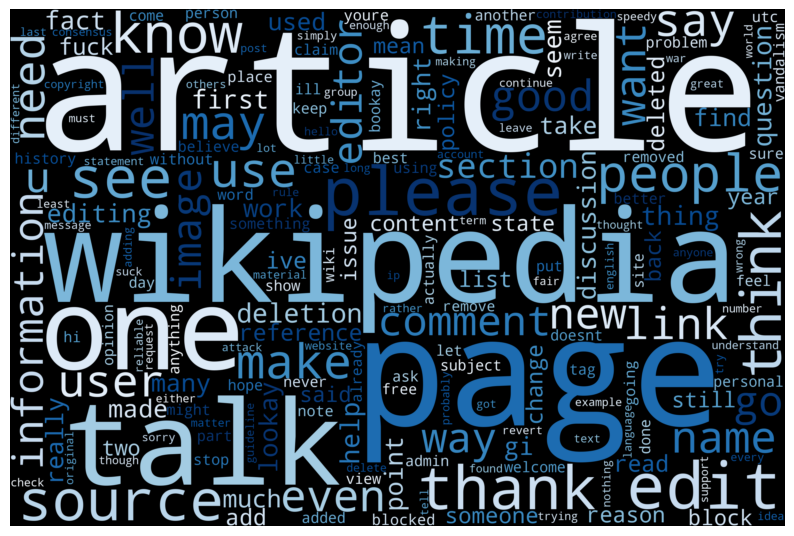

In [50]:
# Function untuk menampilkan wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=[10, 8])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# gabungkan semua text menjadi 1 string
all_text = ' '.join(X.values)

# membuat word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color = 'black',
    colormap = 'Blues_r',
    collocations = False,
).generate(all_text)

# tampilkan wordcloudnya
plot_cloud(wordcloud)

In [51]:
# mengadaptasi vectorizer dengan nilai x
vectorizer.adapt(X.values)

In [52]:
vectorizer('Hello Bang')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 197, 4078,    0, ...,    0,    0,    0], dtype=int64)>

In [53]:
vectorizer('Hello Bang')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 197, 4078], dtype=int64)>

In [54]:
vectorizer('Hello Bang').shape

TensorShape([1800])

In [55]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'article',
 'page',
 'wikipedia',
 'talk',
 'would',
 'one',
 'please',
 'like',
 'see',
 'source',
 'think',
 'also',
 'know',
 'time',
 'people',
 'edit',
 'use',
 'make',
 'may',
 'get',
 'say',
 'need',
 'user',
 'thanks',
 'even',
 'name',
 'link',
 'could',
 'want',
 'good',
 'information',
 'way',
 'well',
 'image',
 'comment',
 'go',
 'editor',
 'section',
 'deletion',
 'thing',
 'help',
 'first',
 'u',
 'question',
 'fact',
 'new',
 'work',
 'editing',
 'point',
 'discussion',
 'edits',
 'thank',
 'gi',
 'right',
 'made',
 'many',
 'much',
 'really',
 'find',
 'used',
 'take',
 'reference',
 'deleted',
 'fuck',
 'ive',
 'read',
 'since',
 'add',
 'cannot',
 'change',
 'list',
 'lookay',
 'someone',
 'reason',
 'policy',
 'still',
 'back',
 'two',
 'year',
 'content',
 'issue',
 'block',
 'state',
 'said',
 'mean',
 'youre',
 'something',
 'case',
 'going',
 'word',
 'blocked',
 'stop',
 'place',
 'note',
 'without',
 'hi',
 'problem',
 'history',
 'utc',
 'adde

In [56]:
vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'float32',
 'max_tokens': 200000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 1800,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 200000}

In [57]:
vectorizer_config = vectorizer.get_config()
vectorizer_vocab = vectorizer.get_vocabulary()

In [61]:
with open('vectorizer_config_v2.pkl', 'wb') as f:
    pickle.dump(vectorizer_config, f)
with open('vectorizer_vocab_v2.pkl', 'wb') as f:
    pickle.dump(vectorizer_vocab, f)

In [62]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[   456,     52,     56, ...,      0,      0,      0],
       [181167,    939,   1165, ...,      0,      0,      0],
       [   314,    309,     59, ...,      0,      0,      0],
       ...,
       [ 27433,   6598,   3690, ...,      0,      0,      0],
       [   431,      9,    123, ...,      0,      0,      0],
       [    59,     12,    155, ...,      0,      0,      0]], dtype=int64)>

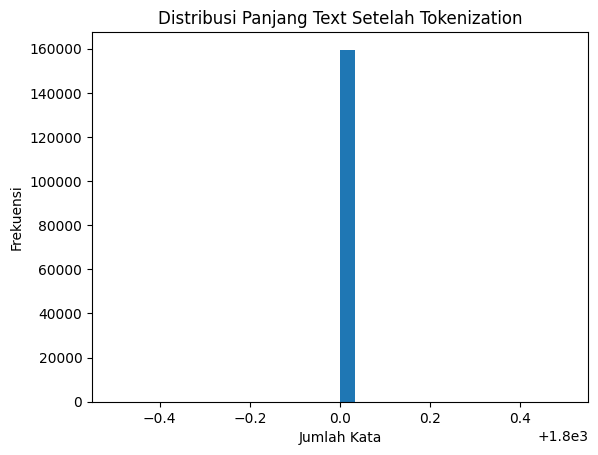

In [63]:
# Visualize text length distribution
text_lengths = [len(comment) for comment in vectorized_text]
plt.hist(text_lengths, bins=30)
plt.title('Distribusi Panjang Text Setelah Tokenization')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

In [67]:
# MCSHBAP -- map, cache, shuffle, batch, prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y)) #Membuat dataset dari tensor, dengan memotong tensor menjadi elemen-elemen individual.
dataset = dataset.cache() # menyimpan dataset dalam memori setelah pertama kali diakses
dataset = dataset.shuffle(160000) # mengacak urutan elemen dalam dataset
dataset = dataset.batch(16) # kelompokkan data ke dalam ukuran batch 16
dataset = dataset.prefetch(8) # helps bottlenecks, Mempersiapkan batch berikutnya di latar belakang untuk mengurangi waktu tunggu selama pelatihan.

In [68]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [69]:
dataset.as_numpy_iterator().next()

(array([[  2658,    644,   1245, ...,      0,      0,      0],
        [   229,    724,     38, ...,      0,      0,      0],
        [ 10426,    127,    268, ...,      0,      0,      0],
        ...,
        [  7250,   1513,   1113, ...,      0,      0,      0],
        [ 26650,  26650,   6685, ...,      0,      0,      0],
        [165577,    723,   2121, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [70]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [71]:
print('Ukuran Batch X', batch_X.shape)
print('Ukuran Batch y', batch_y.shape)

Ukuran Batch X (16, 1800)
Ukuran Batch y (16, 6)


In [72]:
len(dataset)*16 #jml total_data

159584

In [73]:
train = dataset.take(int(len(dataset)*.7)) # 70% dari len dataset
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [74]:
# setiap batch berisi 16 data
print('Jumlah batch data train', len(train))
print('Jumlah batch data val', len(val))
print('Jumlah batch data test', len(test))

Jumlah batch data train 6981
Jumlah batch data val 1994
Jumlah batch data test 997


In [75]:
train_generator = train.as_numpy_iterator()

In [76]:
train_generator.next()

(array([[    3,   995,  4066, ...,     0,     0,     0],
        [  970,  2075,  2172, ...,     0,     0,     0],
        [  273,   309,  1353, ...,     0,     0,     0],
        ...,
        [  145,   178,   953, ...,     0,     0,     0],
        [  204,   659,   179, ...,     0,     0,     0],
        [  726,   100, 21612, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# 2. Membuat Sequential Model

In [57]:
# Mendefinisikan model sequential untuk membangun model secara berurutan
model = Sequential()

# Menambahkan layer embedding untuk memetakan kata-kata menjadi vektor 32 dimensi
model.add(Embedding(MAX_FEATURES + 1, 32))

# Menambahkan layer LSTM Bidirectional dengan 32 unit, menggunakan aktivasi tanh [-1, 1]
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Menambahkan layer Dense sebagai feature extractor dengan 128 unit dan aktivasi ReLU
model.add(Dense(128, activation='relu'))

# Menambahkan layer Dense dengan 256 unit dan aktivasi ReLU
model.add(Dense(256, activation='relu'))

# Menambahkan layer Dense dengan 128 unit dan aktivasi ReLU
model.add(Dense(128, activation='relu'))

# Menambahkan layer Dense terakhir dengan 6 unit dan aktivasi sigmoid [0, 1]
model.add(Dense(6, activation='sigmoid'))


In [58]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3732s 535ms/step - loss: 0.0401 - val_loss: 0.0361
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3719s 533ms/step - loss: 0.0358 - val_loss: 0.0351
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3720s 533ms/step - loss: 0.0320 - val_loss: 0.0290
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3772s 540ms/step - loss: 0.0281 - val_loss: 0.0257
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3796s 544ms/step - loss: 0.0257 - val_loss: 0.0228
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3747s 537ms/step - loss: 0.0229 - val_loss: 0.0208
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3683s 528ms/step - loss: 0.0205 - val_loss: 0.0168
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3831s 549ms/step - loss: 0.0179 - val_loss: 0.0160
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3913s 560ms/step - loss: 0.0161 - val_loss: 0.0135
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3872s 555ms/step - loss: 0.0148 - val_loss: 0.0121


In [65]:
history.history

{'loss': [0.04090297594666481,
  0.03621280565857887,
  0.03251834586262703,
  0.028730863705277443,
  0.0264130812138319,
  0.023242363706231117,
  0.020737402141094208,
  0.018666967749595642,
  0.01678510382771492,
  0.015411471016705036],
 'val_loss': [0.03613119572401047,
  0.03505490720272064,
  0.029043935239315033,
  0.025736451148986816,
  0.0228324756026268,
  0.020839765667915344,
  0.0167977474629879,
  0.015993868932127953,
  0.013488629832863808,
  0.012089943513274193]}

In [66]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

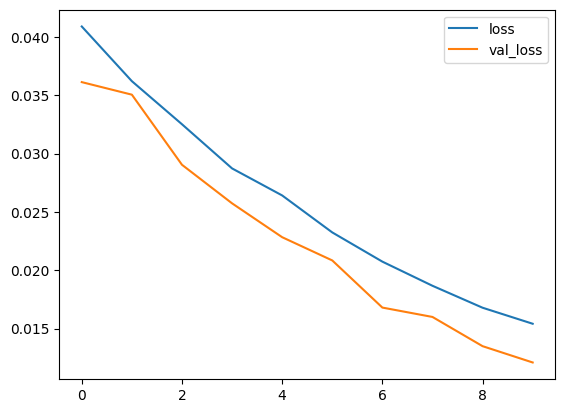

In [67]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Membuat Predictions

In [68]:
input_text = vectorizer('You freaking suck! i will to kill you')

In [69]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [70]:
# model.predict(np.array([input_text]))
model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


array([[0.99844074, 0.17180052, 0.966221  , 0.8043401 , 0.96118313,
        0.285873  ]], dtype=float32)

In [71]:
batch = test.as_numpy_iterator().next()

In [72]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [73]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [74]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


# 4. Evaluasi Model

In [77]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [78]:
for batch in test.as_numpy_iterator():
    # Mendapatkan batch dari iterator dataset test

    X_test, y_test = batch

    # Memprediksi data test menggunakan model yang telah dilatih
    y_pred = (model.predict(X_test)> 0.5).astype(int)

    # Flatten prediksi dan target untuk digunakan dalam perhitungan evaluation metrics
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    # Memperbarui status metrik precision, recall, dan akurasi
    # dengan menggunakan nilai target yang sebenarnya (y_test) dan prediksi model (y_pred)
    pre.update_state(y_test, y_pred)  # Memperbarui presisi
    re.update_state(y_test, y_pred)   # Memperbarui recall
    acc.update_state(y_test, y_pred)  # Memperbarui akurasi


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [112]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9357249736785889, Recall:0.9447630643844604, Accuracy:0.9418254494667053


# 5. Test and Gradio

In [78]:
import tensorflow as tf

In [79]:
# !pip install gradio jinja2

In [80]:
import gradio as gr

C:\Users\Lenovo\scoop\apps\python311\current\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
model.save('toxic-v2.h5')

In [64]:
model = tf.keras.models.load_model('toxic-v2.h5')

In [163]:
input_str = vectorizer('i will kill you')

In [164]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [165]:
res

array([[9.5483367e-05, 2.3777866e-28, 1.9000566e-08, 2.3336324e-14,
        1.5583389e-08, 2.6812688e-15]], dtype=float32)

In [86]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    result = model.predict(vectorized_comment)

    # print kelas klasifikasinya
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, result[0][idx]>0.5)  # Changed results to result

    return text

In [87]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

harus matiin antivirus

In [88]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software: 'C:\\Users\\Lenovo\\scoop\\apps\\python311\\current\\Lib\\site-packages\\gradio\\frpc_windows_amd64_v0.2'